In [9]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


#https://altair-viz.github.io/gallery/errorbars_with_std.html
#import altair as alt
#from vega_datasets import data

#defining paths
results_Baseline_IssueTitle_RandomForest = './experiment/dfTeste.csv'
#classifierChain = './experiment/dfTesteClassifierChain_13Labels.csv'


dataBinary = pd.read_csv(results_Baseline_IssueTitle_RandomForest)
#dataClassifier = pd.read_csv(classifierChain)

In [10]:
dataBinary

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i
0,59:11.1,"(1, 1)",899,Yes,0.2,RandomForest,0.140845,20,0.859155,0.679594,0.163146,0.512575,0.507092,0.702703,0.645598,0.672941,0
1,59:33.4,"(1, 1)",899,Yes,0.2,RandomForest,0.140845,20,0.859155,0.693205,0.168427,0.500592,0.491135,0.695980,0.625282,0.658740,0
2,51:44.0,"(1, 1)",899,Yes,0.2,RandomForest,0.204225,29,0.795775,0.754436,0.140845,0.563123,0.578207,0.723077,0.742664,0.732739,0
3,01:42.0,"(1, 1)",899,Yes,0.2,RandomForest,0.211268,30,0.788732,0.755346,0.139085,0.563973,0.586387,0.721030,0.758465,0.739274,0


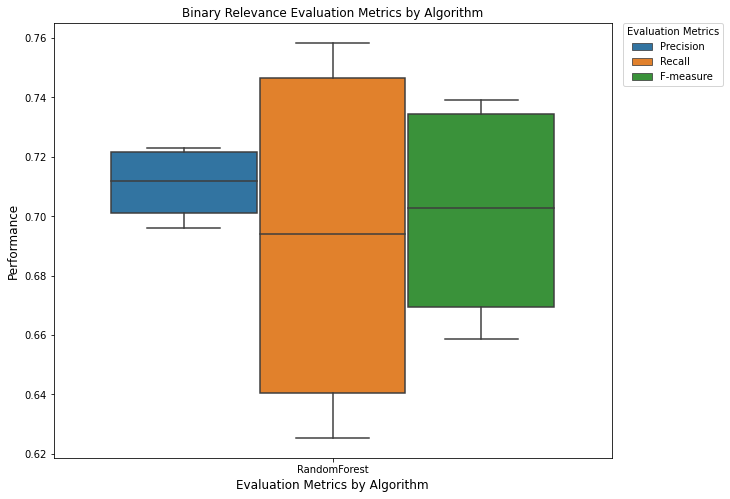

In [11]:
dd=pd.melt(dataBinary,id_vars=['Algorithm'],value_vars=['Precision','Recall','Fmeasure_Score'],var_name='Evaluation Metrics')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='Algorithm',data=dd,hue='Evaluation Metrics')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Algorithm",size=12)

labels=["Precision", "Recall", "F-measure"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Metrics",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Binary Relevance Evaluation Metrics by Algorithm", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")


In [12]:
dataBinary.groupby(['tf-IDF','#_TopTerms']).mean()

,,Train/Test_Size,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i
tf-IDF,#_TopTerms,,,,,,,,,,,,
"(1, 1)",899,0.2,0.174296,24.75,0.825704,0.720645,0.152876,0.535066,0.540705,0.710697,0.693002,0.700924,0.0


In [13]:
dataBinary.nlargest(5,['Precision','Fmeasure_Score'])

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i
2,51:44.0,"(1, 1)",899,Yes,0.2,RandomForest,0.204225,29,0.795775,0.754436,0.140845,0.563123,0.578207,0.723077,0.742664,0.732739,0
3,01:42.0,"(1, 1)",899,Yes,0.2,RandomForest,0.211268,30,0.788732,0.755346,0.139085,0.563973,0.586387,0.721030,0.758465,0.739274,0
0,59:11.1,"(1, 1)",899,Yes,0.2,RandomForest,0.140845,20,0.859155,0.679594,0.163146,0.512575,0.507092,0.702703,0.645598,0.672941,0
1,59:33.4,"(1, 1)",899,Yes,0.2,RandomForest,0.140845,20,0.859155,0.693205,0.168427,0.500592,0.491135,0.695980,0.625282,0.658740,0


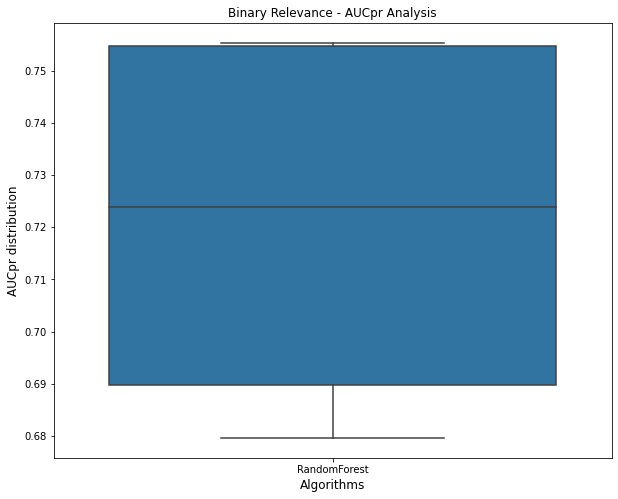

In [14]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='AUC-PR',x='Algorithm',data=dataBinary)
plt.ylabel("AUCpr distribution", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - AUCpr Analysis", size=12)
plt.show()


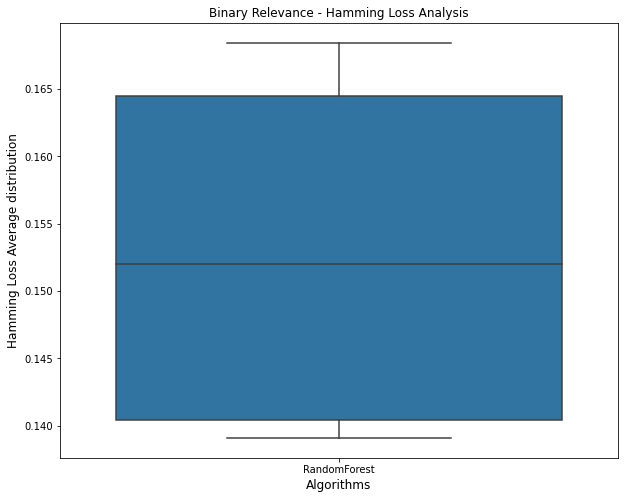

In [15]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='hamming_loss_avg',x='Algorithm',data=dataBinary)
plt.ylabel("Hamming Loss Average distribution", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - Hamming Loss Analysis", size=12)
plt.show()

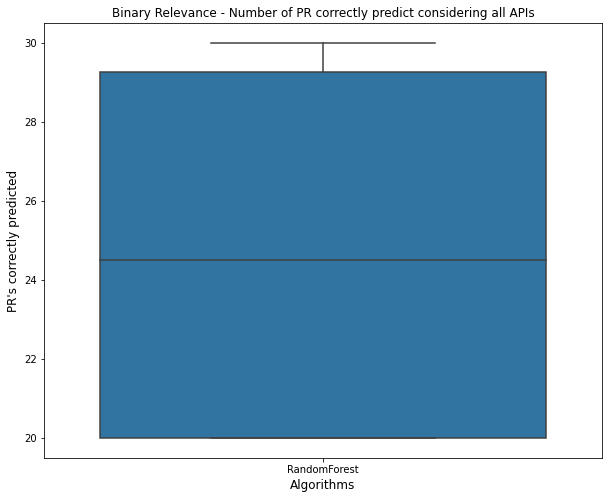

In [16]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='Accuracy_Score_not_normalized',x='Algorithm',data=dataBinary)
plt.ylabel("PR's correctly predicted", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - Number of PR correctly predict considering all APIs", size=12)
plt.show()

In [ ]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [ ]:
#https://machinelearningmastery.com/effect-size-measures-in-python/
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s


In [201]:
#Subsetting data to compute Stats

RF_binary = dataBinary[dataBinary.Algorithm == 'RandomForest']
RF_FMeasure = RF_binary['Fmeasure_Score']

LogisticRegression_binary = dataBinary[dataBinary.Algorithm == 'LogisticRegression']
LogisticRegression_FMeasure = LogisticRegression_binary['Fmeasure_Score']

MLPC_binary = dataBinary[dataBinary.Algorithm == 'MLPClassifier']
MLPC_FMeasure = MLPC_binary['Fmeasure_Score']

DT_binary = dataBinary[dataBinary.Algorithm == 'DecisionTree']
DT_FMeasure = DT_binary['Fmeasure_Score']

MlkNN_binary = dataBinary[dataBinary.Algorithm == 'MLkNN']
MlkNN_FMeasure = MlkNN_binary['Fmeasure_Score']




In [203]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(RF_FMeasure, LogisticRegression_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   
#Effect_Size RandomForest Vs others   
print(cliffsDelta(RF_FMeasure, LogisticRegression_FMeasure))
print(cliffsDelta(RF_FMeasure, MLPC_FMeasure))
print(cliffsDelta(RF_FMeasure, DT_FMeasure))
print(cliffsDelta(RF_FMeasure, MlkNN_FMeasure)) #divisionByZero error

#Effect_Size LogisticRegression Vs others
print(cliffsDelta(LogisticRegression_FMeasure, MLPC_FMeasure))
print(cliffsDelta(LogisticRegression_FMeasure, DT_FMeasure))
print(cliffsDelta(LogisticRegression_FMeasure, MlkNN_FMeasure))

#Effect_Size MLPC Vs others
print(cliffsDelta(MLPC_FMeasure, DT_FMeasure))
print(cliffsDelta(MLPC_FMeasure, MlkNN_FMeasure))

#Effect_Size MlkNN Vs others
print(cliffsDelta(MlkNN_FMeasure,DT_FMeasure))


Statistics=1200.000, p=0.001
Different distribution (reject H0)
(-0.3333333333333333, 'medium')
(0.30666666666666664, 'small')
(0.6055555555555555, 'large')
(0.31666666666666665, 'small')
(0.59, 'large')
(0.7958333333333333, 'large')
(0.5775, 'large')
(0.29583333333333334, 'small')
(0.0125, 'negligible')
(0.2833333333333333, 'small')


In [204]:
#Effect_Size RandomForest Vs others   
print('Cohens d: %.3f' % cohend(RF_FMeasure, LogisticRegression_FMeasure))    
print('Cohens d: %.3f' % cohend(RF_FMeasure, MLPC_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, DT_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, MlkNN_FMeasure))

#Effect_Size LogisticRegression Vs others
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MLPC_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MlkNN_FMeasure))    

#Effect_Size MLPC Vs others
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, MlkNN_FMeasure))    

#Effect_Size MlkNN Vs others
print('Cohens d: %.3f' % cohend(MlkNN_FMeasure,DT_FMeasure))    

Cohens d: -0.467
Cohens d: 0.857
Cohens d: 1.256
Cohens d: 0.585
Cohens d: 1.239
Cohens d: 1.583
Cohens d: 0.869
Cohens d: 0.467
Cohens d: -0.053
Cohens d: 0.437


In [205]:
### Wilcoxon paired and dependent samples

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

#from scipy.stats import wilcoxon

#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('Same distribution (fail to reject H0)')
#else:
#	print('Different distribution (reject H0)')

In [206]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(RF_FMeasure,LogisticRegression_FMeasure, MLPC_FMeasure,DT_FMeasure,MlkNN_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=77.035, p=0.000
Different distributions (reject H0)


In [207]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(RF_FMeasure,LogisticRegression_FMeasure,MLPC_FMeasure,DT_FMeasure,MlkNN_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')


Statistics=76.940, p=0.000
Different distributions (reject H0)


In [208]:
###Precision analysis
#Subsetting data to compute Stats

RF_binary = dataBinary[dataBinary.Algorithm == 'RandomForest']
RF_Precision = RF_binary['Precision']

LogisticRegression_binary = dataBinary[dataBinary.Algorithm == 'LogisticRegression']
LogisticRegression_Precision = LogisticRegression_binary['Precision']

MLPC_binary = dataBinary[dataBinary.Algorithm == 'MLPClassifier']
MLPC_Precision = MLPC_binary['Precision']

DT_binary = dataBinary[dataBinary.Algorithm == 'DecisionTree']
DT_Precision = DT_binary['Precision']

MlkNN_binary = dataBinary[dataBinary.Algorithm == 'MLkNN']
MlkNN_Precision = MlkNN_binary['Precision']

In [209]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(RF_FMeasure, LogisticRegression_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   
#Effect_Size RandomForest Vs others   
print(cliffsDelta(RF_Precision, LogisticRegression_Precision))
print(cliffsDelta(RF_Precision, MLPC_Precision))
print(cliffsDelta(RF_Precision, DT_Precision))
print(cliffsDelta(RF_Precision, MlkNN_Precision)) #divisionByZero error

#Effect_Size LogisticRegression Vs others
print(cliffsDelta(LogisticRegression_Precision, MLPC_Precision))
print(cliffsDelta(LogisticRegression_Precision, DT_Precision))
print(cliffsDelta(LogisticRegression_Precision, MlkNN_Precision))

#Effect_Size MLPC Vs others
print(cliffsDelta(MLPC_Precision, DT_Precision))
print(cliffsDelta(MLPC_Precision, MlkNN_Precision))

#Effect_Size MlkNN Vs others
print(cliffsDelta(MlkNN_Precision,DT_Precision))


Statistics=1200.000, p=0.001
Different distribution (reject H0)
(-0.6716666666666666, 'large')
(0.43, 'medium')
(0.48277777777777775, 'large')
(0.3566666666666667, 'medium')
(0.845, 'large')
(0.8425, 'large')
(0.8375, 'large')
(0.14583333333333334, 'negligible')
(-0.0075, 'negligible')
(0.10666666666666667, 'negligible')


In [210]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=111.411, p=0.000
Different distributions (reject H0)


In [211]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=143.664, p=0.000
Different distributions (reject H0)


In [6]:
ConfusionMatrix = './CM(1, 1)900Yes0.2RandomForest0.csv'
#classifierChain = './experiment/dfTesteClassifierChain_13Labels.csv'


CM = pd.read_csv(ConfusionMatrix, sep=",")

In [33]:
#parsing Confusion matrix 

list(CM.columns) 
type(CM['0'])

columns = ['Label','TN', 'FP','FN','TP']
df = pd.DataFrame(columns=columns)

df['Label'], df['TN'], df['FP'], df['FN'], df['TP'] = CM['0'].str.split(',', 5).str
df = df.drop(0)


In [34]:
df

,Label,TN,FP,FN,TP
1,Google Common,95,8,28,11
2,Test,106,3,27,6
3,SO,128,1,13,0
4,IO,5,39,2,96
5,UI,16,32,7,87
6,Network,87,5,38,12
7,Security,137,0,5,0
8,OpenOffice Documents,135,0,7,0
9,Database,134,0,8,0
10,PDF,137,2,3,0
